From tutorial: https://pytorch.org/tutorials/beginner/fgsm_tutorial.html

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#from methods import *
from utils import *

# Choice of Model to Attack
- LeNet5: MNIST
- Basic CNN: Fashion MNIST
- ResNet20: CIFAR-10
### Run **ONE** of the following 3 cells

In [2]:
from models.LeNet import *
target_mdl = LeNet("models/lenet_mnist_model.pth")
model = target_mdl.model
device = target_mdl.device
test_loader = target_mdl.testloader

In [3]:
from models.simple_FashionMNIST import *
target_mdl = simple_FashionMNIST("models/simple_FashionMNIST.pth")
model = target_mdl.model
device = target_mdl.device
test_loader = target_mdl.testloader

Running on cpu.
Model weights loaded successfully


In [2]:
from models.resNet import ResNet20
target_mdl = ResNet20()
model = target_mdl.model
device = target_mdl.device
test_loader = target_mdl.testloader

Using cache found in C:\Users\JIC/.cache\torch\hub\chenyaofo_pytorch-cifar-models_master


Files already downloaded and verified


In [3]:
#def test(target_model, device, epsilon,num_fw_iter, num_test = 1000, method='fw', early_stopping = None, fw_stepsize_rule = 1, gap_FW_tol = 0.05, targeted = False):
target_model = target_mdl
fw_stepsize_rule = 'decay'
targeted = True
epsilon = 0.1
method = 'fw'#'fw_pair_test'#'fw_away'#
test_idx = 8#10


testloader = target_model.testloader
model = target_model.model

# Accuracy counter
correct = 0
adv_examples = []
hist = []
ex_num = 0
# Loop over all examples in test set
x0, target = None, None
for idx, (x0_cur, target_cur) in enumerate(testloader):
    if idx == test_idx:
        x0, target = x0_cur, target_cur
        break

## init the attack

x_t = x0.detach().clone().to(device)  # Clone and move to device
# Send the data and label to the device
x0, target = x0.to(device), target.to(device)
x0_denorm = target_model.denorm(x0)
if targeted:
    # select a random target for attack that is not the true target.
    adv_target = random.randint(0, target_model.num_classes - 2)
    adv_target = adv_target if adv_target < target else adv_target + 1
    criterion = AdversarialLoss(target_model.num_classes, specific_label=adv_target)
else:
    criterion = AdversarialLoss(target_model.num_classes)
lmo = LMO(epsilon, x0_denorm,p=1)
stepsize_method = stepsize(model, fw_stepsize_rule, x0_denorm, ls_criterion=criterion, ls_target=target, ls_num_samples=20)
attackStep = AttackStep(method, epsilon, x0_denorm, lmo, stepsize_method)
#x_t.requires_grad = True  #Set requires_grad attribute of tensor. Important for Attack
had_first_success = False
gap_FW = None
info = None

t=0

In [13]:
max_step = 1
steps = torch.linspace(max_step / 20, max_step, 20).view(-1,1,1,1)

In [33]:
np.mean([1,2])

1.5

In [32]:
num_steps = 20
d_t = x_t_grad
x_tc = x_t.clone().detach()
d_tc = d_t.clone().detach()
losses = []
with torch.no_grad():
    # Create a tensor of steps
    steps = torch.linspace(max_step / num_steps, max_step, num_steps).to(x_t.device).view(-1, 1, 1, 1)
    
    # Generate all possible x_t + step * d_t combinations in parallel
    x_t_steps = x_tc + steps * d_tc
    
    # Flatten the batch and step dimensions for efficient processing
    batch_size = x_t.size(0)
    num_steps = steps.size(0)
    #x_t_steps = x_t_steps.view(batch_size * num_steps, *x_t.size()[1:])
    
    # Pass through the model in parallel
    output = model(x_t_steps)
    
    # # Compute losses
    output = output.view(batch_size, num_steps, -1)
    target = torch.full((num_steps,), 9, dtype=torch.long)
    
    losses = F.cross_entropy(output, target,reduction='none')
    # losses = losses.mean(dim=-1)  # Assuming ls_criterion returns a loss per element in the batch
    
    # # Find the index of the minimum loss for each example in the batch
    # best_idx = torch.argmin(losses, dim=1)
    
    # # Get the corresponding steps
    # self.stepsize = steps[best_idx]

ValueError: Expected input batch_size (1) to match target batch_size (20).

In [29]:
target.shape

torch.Size([1])

In [14]:
x_t + steps * x_t_grad

tensor([[[[ 4.5759e-01,  3.9474e-01,  1.3177e-01,  ...,  5.4568e-01,
            7.9742e-01,  2.4279e-01],
          [-2.7994e-01, -4.6639e-02,  3.4085e-02,  ...,  8.4039e-01,
            1.5490e+00,  7.1131e-01],
          [-8.6522e-01, -8.3956e-01, -7.8267e-01,  ...,  1.0781e+00,
            1.8039e+00,  1.1309e+00],
          ...,
          [-4.3050e-02,  6.7476e-02,  5.8896e-01,  ...,  8.8255e-01,
            3.4522e-01, -1.0297e-01],
          [ 3.0314e-01,  2.2752e-01,  1.9385e-01,  ...,  2.2245e-01,
           -6.6203e-02,  2.4841e-01],
          [ 8.7021e-02,  1.8285e-02,  3.1229e-02,  ..., -1.8195e-01,
           -2.7140e-01, -2.8364e-02]],

         [[ 1.5763e-02,  3.6860e-02, -1.9547e-01,  ...,  2.1669e-01,
            3.5666e-01,  1.1613e-01],
          [-6.4644e-01, -3.6682e-01, -2.8382e-01,  ...,  3.1707e-01,
            8.1361e-01,  3.8276e-01],
          [-1.1754e+00, -1.1480e+00, -1.0876e+00,  ...,  3.7610e-01,
            8.5389e-01,  6.7764e-01],
          ...,
     

[1]


,example_idx,FW_iter,gap_FW,success,first_success,target,pred,stepsize,l_inf,adv_target,targeted_success
0,0,1,0.246733,False,False,3,3,1.0,0.1,1,False


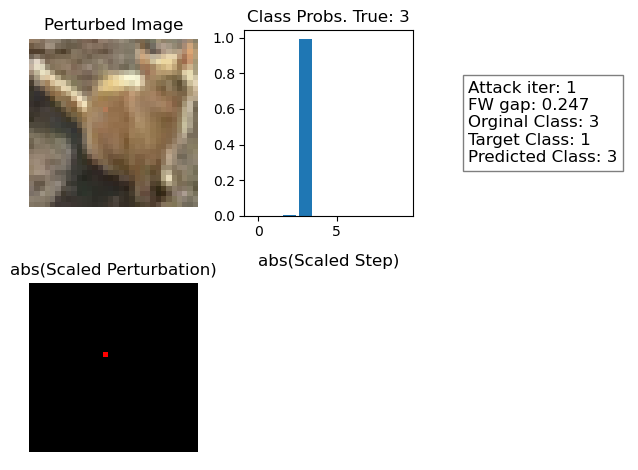

In [4]:
#for t in range(num_fw_iter):
# Step size calculation
if stepsize_method.strat == 'decay':
    stepsize_method.set_stepsize_decay(t)
x_t.requires_grad = True
# Forward pass the data through the model
output = model(x_t)
init_pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability

# Calculate the loss
loss = criterion(output, target)
# Zero all existing gradients
model.zero_grad()
# Calculate gradients of model in backward pass
loss.backward()
x_t_grad = x_t.grad#.data
# Restore the data to its original scale
x_t_denorm = target_model.denorm(x_t)
# Call Attack
with torch.no_grad():
    perturbed_image, gap_FW, info = attackStep.step(x_t_denorm, x_t_grad)

# Reapply normalization
x_t = target_model.renorm(perturbed_image)#transforms.Normalize((0.1307,), (0.3081,))(perturbed_image).detach()
# Re-classify the perturbed image
x_t.requires_grad = False
output = model(x_t)
info['l_inf'] = torch.max(torch.abs(x0_denorm - perturbed_image)).item()
# Check for success
final_pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
if final_pred.item() == target.item():
    success = False
    first_success = False
    # if t == num_fw_iter - 1:
    #     correct += 1
    # Special case for saving 0 epsilon examples
    if epsilon == 0 and len(adv_examples) < 5:
        adv_ex = perturbed_image.squeeze().detach().cpu().numpy()
        adv_examples.append( (init_pred.item(), final_pred.item(), adv_ex) )
else:
    first_success =  not had_first_success
    had_first_success = True
    success = True
    # Save some adv examples for visualization later
    if len(adv_examples) < 5:
        adv_ex = perturbed_image.squeeze().detach().cpu().numpy()
        adv_examples.append( (init_pred.item(), final_pred.item(), adv_ex) )
hist_iter = {
    'example_idx':ex_num,
    'FW_iter': t + 1, # original example is 0
    'gap_FW': gap_FW if gap_FW is not None else None,
    'success': success,
    'first_success': first_success,
    'target': target.item(),
    'pred': final_pred.item(),
}
if targeted:
    info['adv_target'] = adv_target
    info['targeted_success'] = (final_pred.item() == adv_target)
if info is not None:
    hist_iter.update(info) # some methods output dict containing info at each step
hist.append(hist_iter)

t = t+1
#print(len(attackStep.A_t), len(attackStep.S_t))
fig, axs = plt.subplots(2, 3)
axs[0,0].imshow((perturbed_image).squeeze(0).permute(1, 2, 0).numpy())
axs[0,0].set_title('Perturbed Image')
axs[0, 0].axis('off')
#perturbed_image_alpha = sum([alpha * v for alpha, v in zip(attackStep.A_t, attackStep.S_t)])
#axs[1].imshow(((perturbed_image_alpha-x0_denorm).squeeze(0).permute(1, 2, 0).numpy() / epsilon).clip(0,1))
#axs[1].set_title('conv combination')
axs[0,1].bar(range(10),F.softmax(output,dim=1).detach().squeeze(0).numpy())
axs[0,1].set_title(f"Class Probs. True: {hist_iter['target']}")
axs[1,0].imshow(((perturbed_image - x0_denorm).squeeze(0).permute(1, 2, 0).numpy() / epsilon).clip(0,1))
axs[1,0].set_title('abs(Scaled Perturbation)')
axs[1, 0].axis('off')
#axs[1,1].imshow(np.abs((attackStep.last_d).squeeze(0).permute(1, 2, 0).numpy()) / epsilon)
axs[1,1].set_title(f'abs(Scaled Step)')
axs[1, 1].axis('off')
info_text = f"""Attack iter: {hist_iter['FW_iter']}
FW gap: {hist_iter['gap_FW']:.3f}
Orginal Class: {hist_iter['target']}"""
if targeted:
    info_text += f"\nTarget Class: {hist_iter['adv_target']}"
info_text += f"\nPredicted Class: {hist_iter['pred']}"
axs[0, 2].text(0.05, 0.5, info_text,
               fontsize=12, verticalalignment='center', bbox=dict(facecolor='white', alpha=0.5))
axs[0, 2].axis('off')
axs[1, 2].axis('off') 
fig.tight_layout()
print(attackStep.A_t)
pd.DataFrame(hist)

In [10]:
attackStep.d_t

AttributeError: 'AttackStep' object has no attribute 'd_t'

In [194]:
max_step = 1
self = stepsize_method
self.x_t_grad = x_t_grad
x_k = x_t
d_k = attackStep.d_t
step_size = max_step
gamma = np.mean(good_gammas)
print(gamma)
delta = 0.5
initial_loss = self.ls_criterion(self.model(x_k), self.ls_target)#F.cross_entropy(self.model(x_k), target).item()
min_loss = float('inf')

while step_size > 1e-4:
    new_point = x_k + step_size * d_k
    new_loss = self.ls_criterion(self.model(new_point), self.ls_target)#F.cross_entropy(self.model(new_point), target).item()
    RHS = initial_loss + gamma * step_size * torch.sum(self.x_t_grad * d_k).item()
    if new_loss < min_loss:
        min_loss = new_loss
        best_stepsize = step_size
        best_gamma = ((new_loss - initial_loss) / (step_size * torch.sum(self.x_t_grad * d_k).item())).item()

    # if new_loss <= RHS:
    #     return step_size
    print(f"{step_size:.3e}", new_loss.item(), RHS.item(), new_loss.item() <= RHS.item(), new_loss.item() - RHS.item())
    step_size *= delta
print(best_gamma, best_stepsize)
if (abs(best_stepsize - 1) < 0.001) and (best_stepsize > 0.0001):
    good_gammas.append(best_gamma)

0.2920325770974159
1.000e+00 6.194394111633301 4.854534149169922 False 1.339859962463379
5.000e-01 6.270532608032227 5.621160984039307 False 0.6493716239929199
2.500e-01 6.334023952484131 6.004474639892578 False 0.32954931259155273
1.250e-01 6.363980770111084 6.196131229400635 False 0.16784954071044922
6.250e-02 6.376316070556641 6.291959285736084 False 0.08435678482055664
3.125e-02 6.381865501403809 6.339873790740967 False 0.0419917106628418
1.562e-02 6.384681701660156 6.36383056640625 False 0.02085113525390625
7.812e-03 6.386247634887695 6.375809192657471 False 0.01043844223022461
3.906e-03 6.387024402618408 6.38179874420166 False 0.005225658416748047
1.953e-03 6.387403964996338 6.384793281555176 False 0.0026106834411621094
9.766e-04 6.387596607208252 6.386290550231934 False 0.0013060569763183594
4.883e-04 6.387692928314209 6.3870391845703125 False 0.0006537437438964844
2.441e-04 6.387740612030029 6.387413501739502 False 0.00032711029052734375
1.221e-04 6.387767314910889 6.3876004219

In [196]:
good_gammas

[0.2770460247993469,
 0.20937064290046692,
 0.25396445393562317,
 0.4277491867542267,
 0.03683491423726082]

In [149]:
good_gammas = []

In [15]:
initial_loss

tensor(2.2034, grad_fn=<MeanBackward0>)

In [13]:
x_t.shape

torch.Size([1, 3, 32, 32])

In [14]:
torch.linspace(0, 1, steps=100)*x_t

RuntimeError: The size of tensor a (100) must match the size of tensor b (32) at non-singleton dimension 3

In [8]:
attackStep.A_t

[0.219375, 0.25, 0.2625, 0.268125]

In [59]:
torch.argmax(torch.norm(torch.abs(x_t_grad), p=2, dim=1))

tensor(567)

In [63]:
x_t_grad[0][1][567]

IndexError: index 567 is out of bounds for dimension 0 with size 32

In [20]:
attackStep.A_t

[0.0,
 0.3,
 0.034999999999999996,
 0.033249999999999995,
 0.0315875,
 0.030008124999999997,
 0.02850771875,
 0.0270823328125,
 0.025728216171874995,
 0.19553444290624997,
 0.01466508321796875,
 0.01393182905707031,
 0.2647047520843359,
 0.0]

In [14]:
x_t_grad

tensor([[[[ 0.0295,  0.0847, -0.0787,  ...,  0.0267,  0.0212, -0.0294],
          [ 0.0583,  0.2090, -0.0759,  ...,  0.1431,  0.0360, -0.0684],
          [-0.0887,  0.1439, -0.2277,  ..., -0.1419, -0.0117,  0.0682],
          ...,
          [ 0.0121, -0.0098,  0.0624,  ...,  0.0845, -0.0210,  0.0286],
          [-0.0004, -0.0257,  0.0341,  ..., -0.0808,  0.0360, -0.0096],
          [-0.0045,  0.0078, -0.0311,  ...,  0.0036, -0.0188,  0.0356]],

         [[-0.0440,  0.0684, -0.0762,  ..., -0.0912,  0.0243,  0.0120],
          [-0.0539,  0.1467, -0.1073,  ...,  0.0425, -0.0111, -0.0498],
          [-0.1389,  0.0461, -0.3204,  ..., -0.0673, -0.0387,  0.0187],
          ...,
          [ 0.0292,  0.0112,  0.1240,  ...,  0.0147, -0.0970, -0.0240],
          [-0.0006, -0.0315,  0.0175,  ..., -0.1530, -0.0337, -0.0366],
          [ 0.0048,  0.0089, -0.0562,  ..., -0.0258, -0.0438,  0.0341]],

         [[-0.0472, -0.0418, -0.0535,  ..., -0.0712,  0.0409,  0.0396],
          [-0.0385,  0.0330, -

In [15]:
away_costs = []
for v in attackStep.S_t:
    away_costs.append(torch.sum(x_t_grad * v).item())

In [16]:
away_costs

[-0.07419276237487793,
 -1.8071980476379395,
 -2.2187280654907227,
 -2.477816581726074,
 -2.539658546447754,
 -2.5875699520111084,
 -2.697305679321289]

In [111]:
output

tensor([[-1.1356,  4.7972, -2.5314, -0.0619, -2.3139, -1.0117, -0.8151, -2.1240,
          0.3018,  4.8943]], grad_fn=<AddmmBackward0>)

In [112]:
target

tensor([9])

In [113]:
# Targeting a specific incorrect label
targets = target
outputs = output
specific_label = 0
incorrect_labels = torch.full_like(targets, specific_label)
mask = (incorrect_labels != targets).float()
specific_log_probs = F.log_softmax(outputs, dim=1).gather(1, incorrect_labels.unsqueeze(1)).squeeze(1)
loss = -specific_log_probs * mask


In [115]:
specific_log_probs

tensor([-6.6901], grad_fn=<SqueezeBackward1>)

In [8]:
perturbed_image - x0_denorm

tensor([[[[ 0.0050,  0.0050, -0.0050,  ..., -0.0050, -0.0050,  0.0050],
          [ 0.0050,  0.0050, -0.0050,  ..., -0.0050,  0.0050, -0.0050],
          [ 0.0050,  0.0050, -0.0050,  ...,  0.0050,  0.0050,  0.0050],
          ...,
          [-0.0050,  0.0050,  0.0050,  ...,  0.0050, -0.0050,  0.0050],
          [ 0.0050, -0.0050,  0.0050,  ...,  0.0050,  0.0050, -0.0050],
          [ 0.0050, -0.0050,  0.0050,  ...,  0.0050, -0.0050,  0.0050]],

         [[ 0.0050,  0.0050, -0.0050,  ...,  0.0050, -0.0050,  0.0050],
          [-0.0050, -0.0050,  0.0050,  ..., -0.0050,  0.0050, -0.0050],
          [-0.0050, -0.0050, -0.0050,  ..., -0.0050, -0.0050, -0.0050],
          ...,
          [-0.0050, -0.0050, -0.0050,  ...,  0.0050, -0.0050, -0.0050],
          [ 0.0050, -0.0050,  0.0050,  ..., -0.0050, -0.0050,  0.0050],
          [ 0.0050, -0.0050,  0.0050,  ..., -0.0050, -0.0050,  0.0050]],

         [[ 0.0050, -0.0050, -0.0050,  ...,  0.0050, -0.0050,  0.0050],
          [-0.0050, -0.0050,  

In [51]:
accuracies = []
examples = []
hist_dfs = []
final_hist_dfs = []
hist = None

debug = True
ex_saver = example_saver()
# Run test for each epsilon
algs = ['fw', 'fw_away', 'fw_pair']
for alg in algs:
    
    acc, ex, hist = test(target_mdl, device,
                         epsilon = 0.005, 
                         num_fw_iter = 15,
                         method = alg, 
                         early_stopping = 'gap_FW', 
                         fw_stepsize_rule = 'decay', 
                         gap_FW_tol = 0.1,
                         targeted = True, 
                         num_test = 250, 
                         ex_saver=ex_saver)
    accuracies.append(acc)
    examples.append(ex)
    hist_dfs.append(hist)
    final_hist = hist.groupby('example_idx').tail(1)
    final_hist_dfs.append(final_hist) # hist with just the rows of last FW iters
final_hist_dfs[-1]

  3%|▎         | 271/10000 [00:41<24:56,  6.50it/s]


Epsilon: 0.005	Correct Classifications (Failed Attacks) = 83 / 250 = 0.332
fw
Attack Success Rate: 0.644


  3%|▎         | 272/10000 [00:47<28:10,  5.75it/s]


Epsilon: 0.005	Correct Classifications (Failed Attacks) = 82 / 250 = 0.328
fw_away
Attack Success Rate: 0.644


  3%|▎         | 273/10000 [01:02<36:58,  4.38it/s]

Epsilon: 0.005	Correct Classifications (Failed Attacks) = 139 / 250 = 0.556
fw_pair
Attack Success Rate: 0.156


,example_idx,FW_iter,gap_FW,success,first_success,target,pred,stop_cond,adv_target,gap_AS,l_inf,mdlLoss,targeted_success
14,0,15,4.379326,True,False,3,6,max_iter,1,0.300421,0.006865,10.289163,False
29,1,15,1.380828,False,False,7,7,max_iter,3,1.309280,0.005000,5.814804,False
44,2,15,2.970185,False,False,0,0,max_iter,7,0.545457,0.005000,5.109504,False
59,3,15,2.884135,True,False,3,2,max_iter,8,0.690552,0.005000,2.870619,False
74,4,15,0.869551,False,False,1,1,max_iter,6,0.348044,0.005000,8.895464,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3558,245,15,3.579576,False,False,3,3,max_iter,1,0.114062,0.019190,14.119556,False
3573,246,15,2.939208,False,False,4,4,max_iter,9,1.937876,0.005000,3.142663,False
3588,247,15,3.589839,False,False,0,0,max_iter,2,0.732675,0.005000,1.583095,False
3603,248,15,4.577424,True,False,2,0,max_iter,9,0.337246,0.005000,4.170929,False


In [55]:
for i, final_hist in enumerate(final_hist_dfs):
    print(algs[i])
    print(f"Attack Success Rate: {final_hist['targeted_success' if targeted else 'success'].mean()}")
    print(f"Avg iters: {final_hist['FW_iter'].mean()}")

fw
Attack Success Rate: 0.644
Avg iters: 10.132
fw_away
Attack Success Rate: 0.644
Avg iters: 10.344
fw_pair
Attack Success Rate: 0.156
Avg iters: 14.476


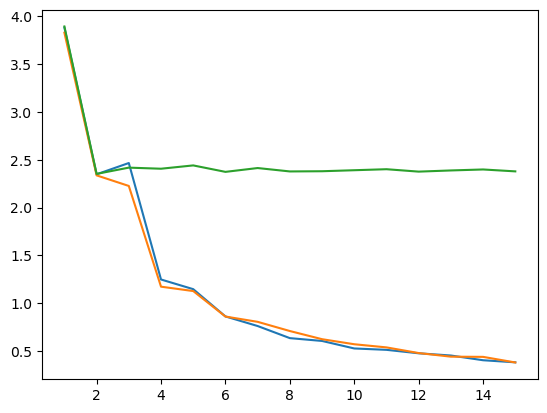

In [65]:
plt.plot(hist_dfs[0].groupby('FW_iter')['gap_FW'].mean())
plt.plot(hist_dfs[1].groupby('FW_iter')['gap_FW'].mean())
plt.plot(hist_dfs[2].groupby('FW_iter')['gap_FW'].mean())

In [66]:
hist_dfs[1].groupby('step_type').size()

step_type
AS     362
FW    2224
dtype: int64

<Axes: xlabel='FW_iter'>

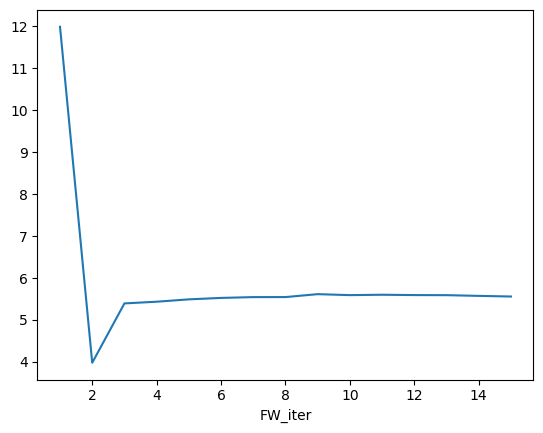

In [25]:
hist.groupby('FW_iter')['mdlLoss'].mean().plot()

In [40]:
final_hist.groupby('stop_cond').size()

stop_cond
gap         224
max_iter     26
dtype: int64

In [19]:
final_hist.groupby('success')['gap_FW'].mean()

success
False    0.414841
True     0.106524
Name: gap_FW, dtype: float64

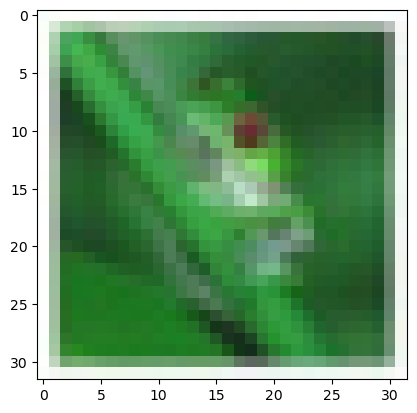

In [20]:
plt.imshow(np.transpose(ex[3][2], (1, 2, 0)))

Mean FW iterations: 4.888


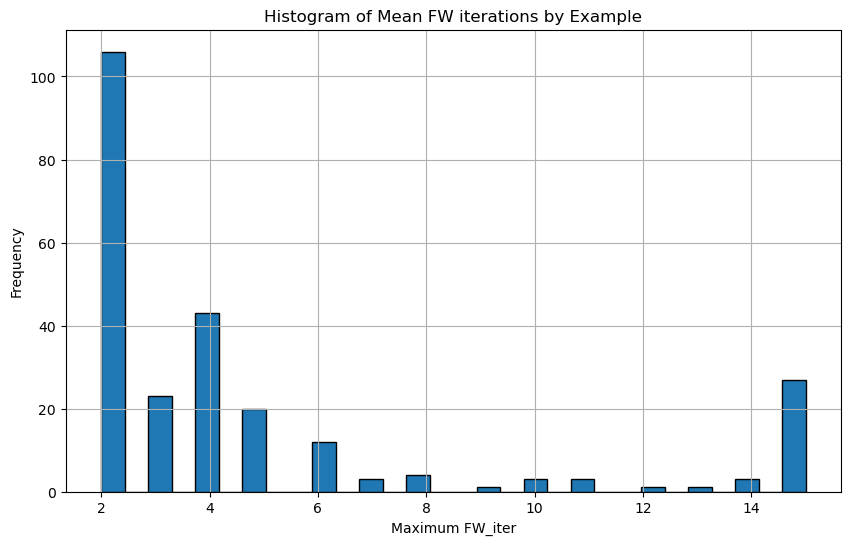

In [41]:
num_iters = hist.groupby('example_idx')['FW_iter'].max()
print(f"Mean FW iterations: {num_iters.mean()}")
plt.figure(figsize=(10, 6))
num_iters.plot(kind='hist', bins=30, edgecolor='black')
plt.title('Histogram of Mean FW iterations by Example')
plt.xlabel('Maximum FW_iter')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [42]:
final_hist['success'].mean()

0.916

In [43]:
final_hist['FW_iter'].mean()

4.888

In [31]:
# accuracy
hist.groupby('example_idx')['first_success'].sum().mean()

0.62

In [28]:
# average number of iterations for success
hist[hist['first_success']]['FW_iter'].mean()

1.0258064516129033

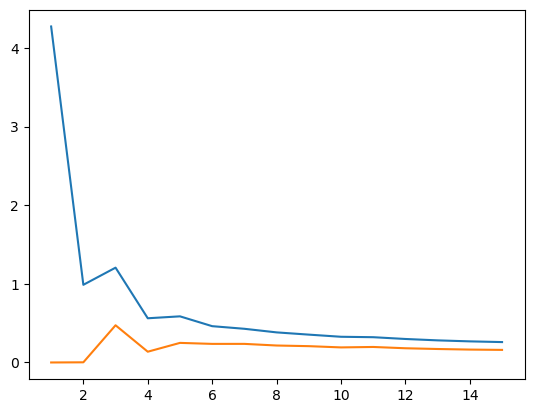

In [7]:
plt.plot(hist.groupby('FW_iter')['gap_FW'].mean())
plt.plot(hist.groupby('FW_iter')['gap_AS'].mean())

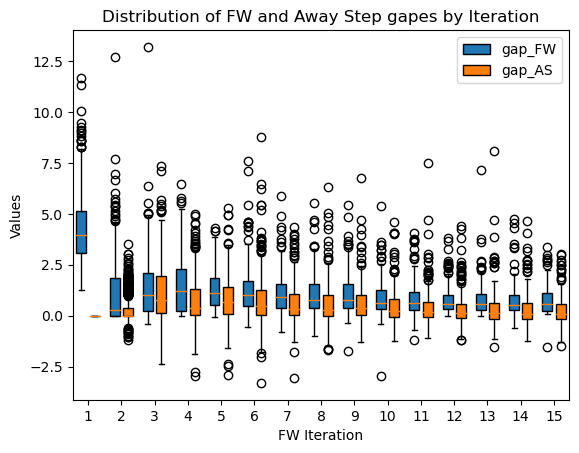

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample data generation for demonstration purposes

# Extracting unique iteration groups
groups = hist['FW_iter'].unique()

# Creating lists to hold data for each group
data_FW = []
data_AS = []

for group in groups:
    data_FW.append(hist[hist['FW_iter'] == group]['gap_FW'].values)
    data_AS.append(hist[hist['FW_iter'] == group]['gap_AS'].values)

# Plotting
fig, ax = plt.subplots()

# Positions of the boxplots
positions_FW = np.arange(1, len(groups) + 1) * 2.0 - 0.4
positions_AS = np.arange(1, len(groups) + 1) * 2.0 + 0.4

# Creating the boxplots
box_FW = ax.boxplot(data_FW, positions=positions_FW, widths=0.6, patch_artist=True, boxprops=dict(facecolor="C0"))
box_AS = ax.boxplot(data_AS, positions=positions_AS, widths=0.6, patch_artist=True, boxprops=dict(facecolor="C1"))

# Customizing the plot
ax.set_xlabel('FW Iteration')
ax.set_ylabel('Values')
ax.set_title('Distribution of FW and Away Step gapes by Iteration')
ax.set_xticks(np.arange(1, len(groups) + 1) * 2.0)
ax.set_xticklabels([i for i in groups])

# Adding legend
ax.legend([box_FW["boxes"][0], box_AS["boxes"][0]], ['gap_FW', 'gap_AS'], loc='upper right')

# Display the plot
plt.show()


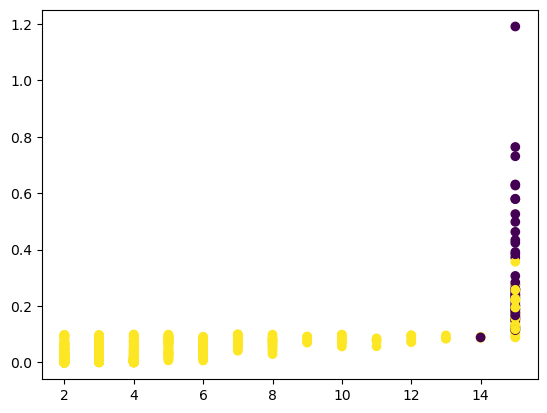

In [15]:
plt.scatter(final_hist['FW_iter'],final_hist['gap_FW'], c=final_hist['success'])

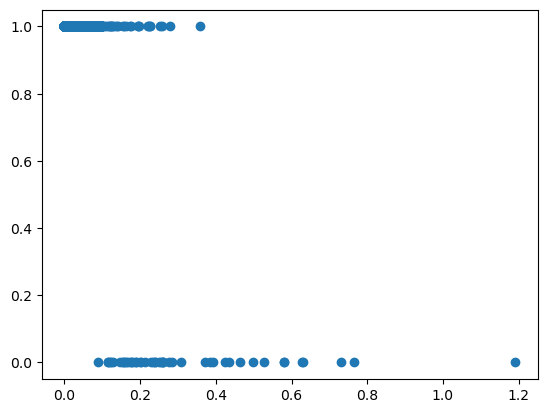

In [16]:
plt.scatter(final_hist['gap_FW'], final_hist['success'])

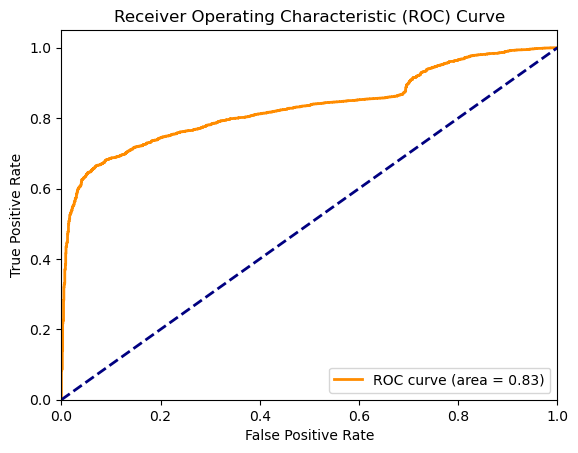

In [ ]:
from sklearn.metrics import roc_curve, auc

# Sample data: true binary labels and predicted probabilities
y_true = hist['success']
y_scores = 1- hist['gap_trans']

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

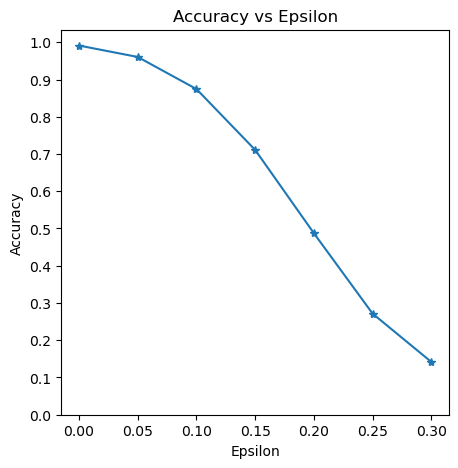

In [ ]:
plt.figure(figsize=(5,5))
plt.plot(epsilons, accuracies, "*-")
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.xticks(np.arange(0, .35, step=0.05))
plt.title("Accuracy vs Epsilon")
plt.xlabel("Epsilon")
plt.ylabel("Accuracy")
plt.show()

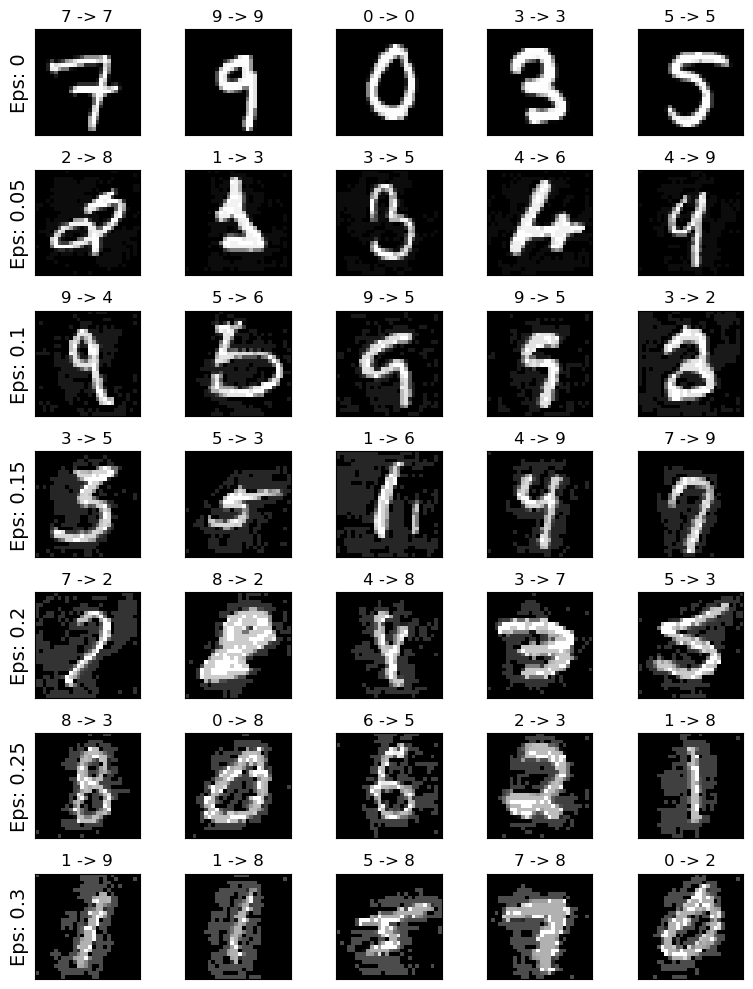

In [ ]:
# Plot several examples of adversarial samples at each epsilon
cnt = 0
plt.figure(figsize=(8,10))
for i in range(len(epsilons)):
    for j in range(len(examples[i])):
        cnt += 1
        plt.subplot(len(epsilons),len(examples[0]),cnt)
        plt.xticks([], [])
        plt.yticks([], [])
        if j == 0:
            plt.ylabel(f"Eps: {epsilons[i]}", fontsize=14)
        orig,adv,ex = examples[i][j]
        plt.title(f"{orig} -> {adv}")
        plt.imshow(ex, cmap="gray")
plt.tight_layout()
plt.show()